In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate the model to predict Pe

In [2]:
d = pd.read_excel("data/NASCseq.xlsx")
d = d[(d["CellLine"] == "K562") & (d["s4U"] == 0) & (d["Layout"] == "PE")]
print("Number of control cells:", len(d))

Number of control cells: 39


In [3]:
d

,Run,Cell,CellLine,s4U,Time,Method,Layout,Strand,Species
0,20220113_NASCseq_K562,20220113_02_02,K562,0,3.0,NASC-seq,PE,UN,Human
1,20220113_NASCseq_K562,20220113_02_04,K562,0,3.0,NASC-seq,PE,UN,Human
2,20220113_NASCseq_K562,20220113_02_05,K562,0,3.0,NASC-seq,PE,UN,Human
3,20220113_NASCseq_K562,20220113_02_07,K562,0,3.0,NASC-seq,PE,UN,Human
4,20220113_NASCseq_K562,20220113_02_08,K562,0,3.0,NASC-seq,PE,UN,Human
5,20220113_NASCseq_K562,20220113_03_01,K562,0,3.0,NASC-seq,PE,UN,Human
6,20220113_NASCseq_K562,20220113_03_02,K562,0,3.0,NASC-seq,PE,UN,Human
7,20220113_NASCseq_K562,20220113_03_03,K562,0,3.0,NASC-seq,PE,UN,Human
8,20220113_NASCseq_K562,20220113_03_05,K562,0,3.0,NASC-seq,PE,UN,Human
9,20220113_NASCseq_K562,20220113_03_06,K562,0,3.0,NASC-seq,PE,UN,Human


In [4]:
array = []
for run, cell in d[["Run", "Cell"]].values:
    path = "results/mismatch/ratio/%s/%s.tsv" % (run, cell)
    m = pd.read_csv(path, sep="\t", header=0, index_col=0)
    m = m[["-" not in t for t in m.index]]
    s = m["Ratio.NoSNP"]
    s.name = cell
    array.append(s)
m = pd.DataFrame(array)
m.index.name = "Cell"

In [5]:
mtypes = []
bases = "ACGT"
for b1 in "ACGT":
    for b2 in "ACGT":
        if b1 != b2:
            mtypes.append("%s%s" % (b1, b2))

Type	K	R
AC	0.9393	0.0394
AG	1.4594	0.9654
AT	1.265	0.494
CA	0.9182	0.1876
CG	3.5457	0.6466
CT	0.9377	0.9041
GA	1.0492	0.9357
GC	2.3972	0.6042
GT	0.5966	0.1584
TA	0.8509	0.5231
TC	1.0	1.0
TG	0.576	0.0522


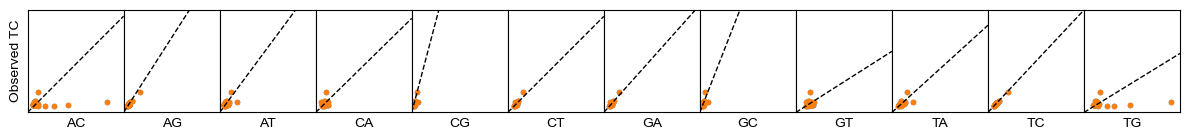

In [6]:
lim = m.max().max() * 1.1
fig, axs = plt.subplots(1, 12, figsize=(12, 1.5), sharex=True, sharey=True, gridspec_kw=dict(wspace=0))
rows = []
print("Type\tK\tR")
for i, mtype in enumerate(mtypes):
    ax = axs[i]
    plt.sca(ax)
    xs = m[mtype]
    ys = m["TC"]
    flags = (xs > lim * 0) & (ys > lim * 0)
    xs1 = xs[flags]
    ys1 = ys[flags]
    r = np.corrcoef(xs1, ys1)[0][1]
    k = np.e ** ((sum(np.log(ys1)) - sum(np.log(xs1))) / len(xs1))
    print(mtype, round(k, 4), round(r, 4),sep="\t")
    rows.append([mtype, k, r])
    plt.scatter(xs, ys, marker=".")
    plt.scatter(xs1, ys1, marker=".")
    plt.plot([0, lim], [0, lim * k], lw=1, ls="--", color="black")
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(mtype)
    if i == 0:
        plt.ylabel("Observed TC")
plt.tight_layout()
plt.show()

In [7]:
model = pd.DataFrame(rows, columns=["Type", "K", "R"])
model = model[(model["Type"] != "TC") & (model["R"] >= 0.8)]
model["W"] = model["R"] / model["R"].sum()
model.to_csv("reports/Estimate.Pe.Model.K562.PE.tsv", sep="\t", index=False)
print("Model:")
print(model)

Model:
  Type         K         R         W
1   AG  1.459396  0.965406  0.344146
5   CT  0.937679  0.904083  0.322286
6   GA  1.049189  0.935731  0.333568


In [8]:
array = []
for t, k, r, w in model.values:
    array.append(m[t] * k * w)
m1 = m.copy()
m1["Pe"] = pd.DataFrame(array).sum(axis=0)

Custom strategy
K: 0.9979, R: 0.9637


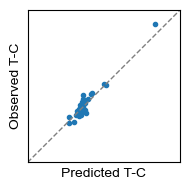

NASC-seq strategy
K: 0.9901, R: 0.9253


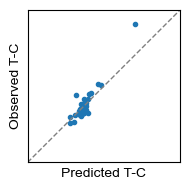

GRAND-SLAM strategy
K: 0.6761, R: 0.1397


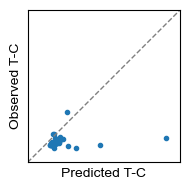

In [9]:
params = [
    ["Custom strategy", m1["Pe"], m1["TC"]],
    ["NASC-seq strategy", (m1["CT"] + m1["GA"]) / 2, m1["TC"]],
    ["GRAND-SLAM strategy", ((m1["TA"] + m1["TG"]) / 2), m1["TC"]]
]
for name, xs, ys in params:
    print(name)
    lim = max(max(xs), max(ys)) * 1.1
    r = np.corrcoef(xs, ys)[0][1]
    k = np.e ** ((sum(np.log(ys)) - sum(np.log(xs))) / len(xs))
    print("K: %.4f, R: %.4f" % (k, r))
    plt.figure(figsize=(2, 2))
    plt.scatter(xs, ys, marker=".")
    plt.plot([0, lim], [0, lim], lw=1, color="grey", ls="--")
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Predicted T-C")
    plt.ylabel("Observed T-C")
    plt.tight_layout()
    plt.show()
    plt.close()

# Plot signal to noise

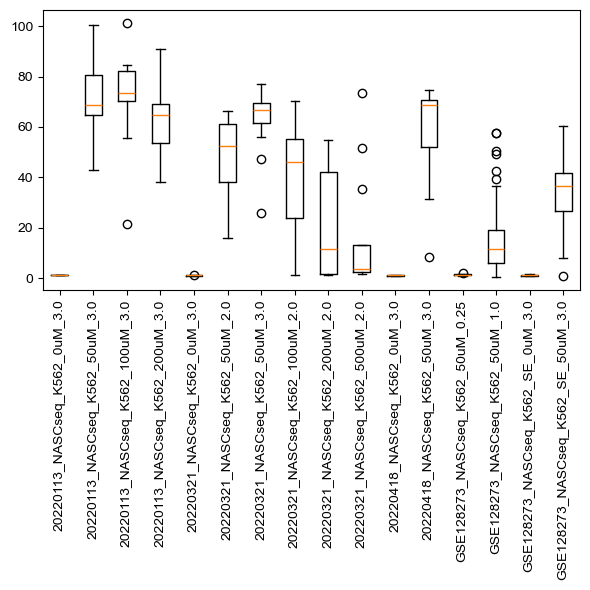

In [11]:
dat = pd.read_csv("reports/NASCseq_Summary.csv")

names = []
array = []
for run, d1 in dat.groupby(by="Run"):
    for s4u, d2 in d1.groupby(by="s4U"):
        for time, d3 in d2.groupby(by="Time"):
            # print(run, s4u, time, len(d3), sep="\t")
            name = "%s_%duM_%s" % (run, s4u, time)
            names.append(name)
            array.append(d3["Pc_Pe"].values)
xs = np.arange(len(array))

plt.figure(figsize=(6, 6))
plt.boxplot(array, positions=xs)
plt.xticks(xs, names, rotation=90)
# plt.ylim(0, 0.1)
plt.tight_layout()
plt.show()

In [12]:
dat

,Run,Cell,CellLine,s4U,Time,Method,Layout,Strand,Species,Total.Reads,...,TA.Ratio,TC.Ratio,TG.Ratio,Protein_coding,Protein_coding.Nascent,lncRNA,lncRNA.Nascent,Pe,Pc,Pc_Pe
0,20220113_NASCseq_K562,20220113_02_02,K562,0,3.0,NASC-seq,PE,UN,Human,2725284,...,0.000864,0.000550,0.003743,5608,1123,406,40,0.000562,0.000713,1.270204
1,20220113_NASCseq_K562,20220113_02_04,K562,0,3.0,NASC-seq,PE,UN,Human,2834906,...,0.000617,0.000473,0.002482,4280,955,238,34,0.000535,0.000586,1.093915
2,20220113_NASCseq_K562,20220113_02_05,K562,0,3.0,NASC-seq,PE,UN,Human,3669883,...,0.000512,0.000455,0.001147,4521,883,274,26,0.000475,0.000578,1.216019
3,20220113_NASCseq_K562,20220113_02_07,K562,0,3.0,NASC-seq,PE,UN,Human,1431122,...,0.001686,0.000777,0.007125,4631,1178,292,49,0.000646,0.000808,1.250802
4,20220113_NASCseq_K562,20220113_02_08,K562,0,3.0,NASC-seq,PE,UN,Human,3314535,...,0.000728,0.000526,0.001849,6672,1485,492,36,0.000478,0.000669,1.400619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,GSE128273_NASCseq_K562_SE,H08,K562,50,3.0,NASC-seq,SE,UN,Human,4074703,...,0.001320,0.012528,0.000879,3465,1712,313,93,0.001273,0.044115,34.659547
423,GSE128273_NASCseq_K562_SE,H09,K562,50,3.0,NASC-seq,SE,UN,Human,4185915,...,0.001090,0.010359,0.000913,4555,2204,370,123,0.001009,0.046070,45.648231
424,GSE128273_NASCseq_K562_SE,H10,K562,50,3.0,NASC-seq,SE,UN,Human,5425540,...,0.001058,0.010947,0.000811,5278,2561,474,139,0.001074,0.050112,46.664532
425,GSE128273_NASCseq_K562_SE,H11,K562,50,3.0,NASC-seq,SE,UN,Human,6164041,...,0.001088,0.008134,0.000923,4556,2102,383,129,0.001084,0.040672,37.525745
